In [2]:
import pandas as pd
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

In [3]:
daywise=pd.read_csv('day_wise.csv')
daywise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [4]:
#Displaying dataset shape
daywise.shape

(188, 12)

In [5]:
daywise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


### Data Cleaning

In [6]:
#Correct Date Format
daywise['Date']=pd.to_datetime(daywise['Date'])
daywise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    188 non-null    datetime64[ns]
 1   Confirmed               188 non-null    int64         
 2   Deaths                  188 non-null    int64         
 3   Recovered               188 non-null    int64         
 4   Active                  188 non-null    int64         
 5   New cases               188 non-null    int64         
 6   New deaths              188 non-null    int64         
 7   New recovered           188 non-null    int64         
 8   Deaths / 100 Cases      188 non-null    float64       
 9   Recovered / 100 Cases   188 non-null    float64       
 10  Deaths / 100 Recovered  188 non-null    float64       
 11  No. of countries        188 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory 

In [7]:
#To check null values
daywise.isnull().sum()
# There's no null values

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

<Axes: >

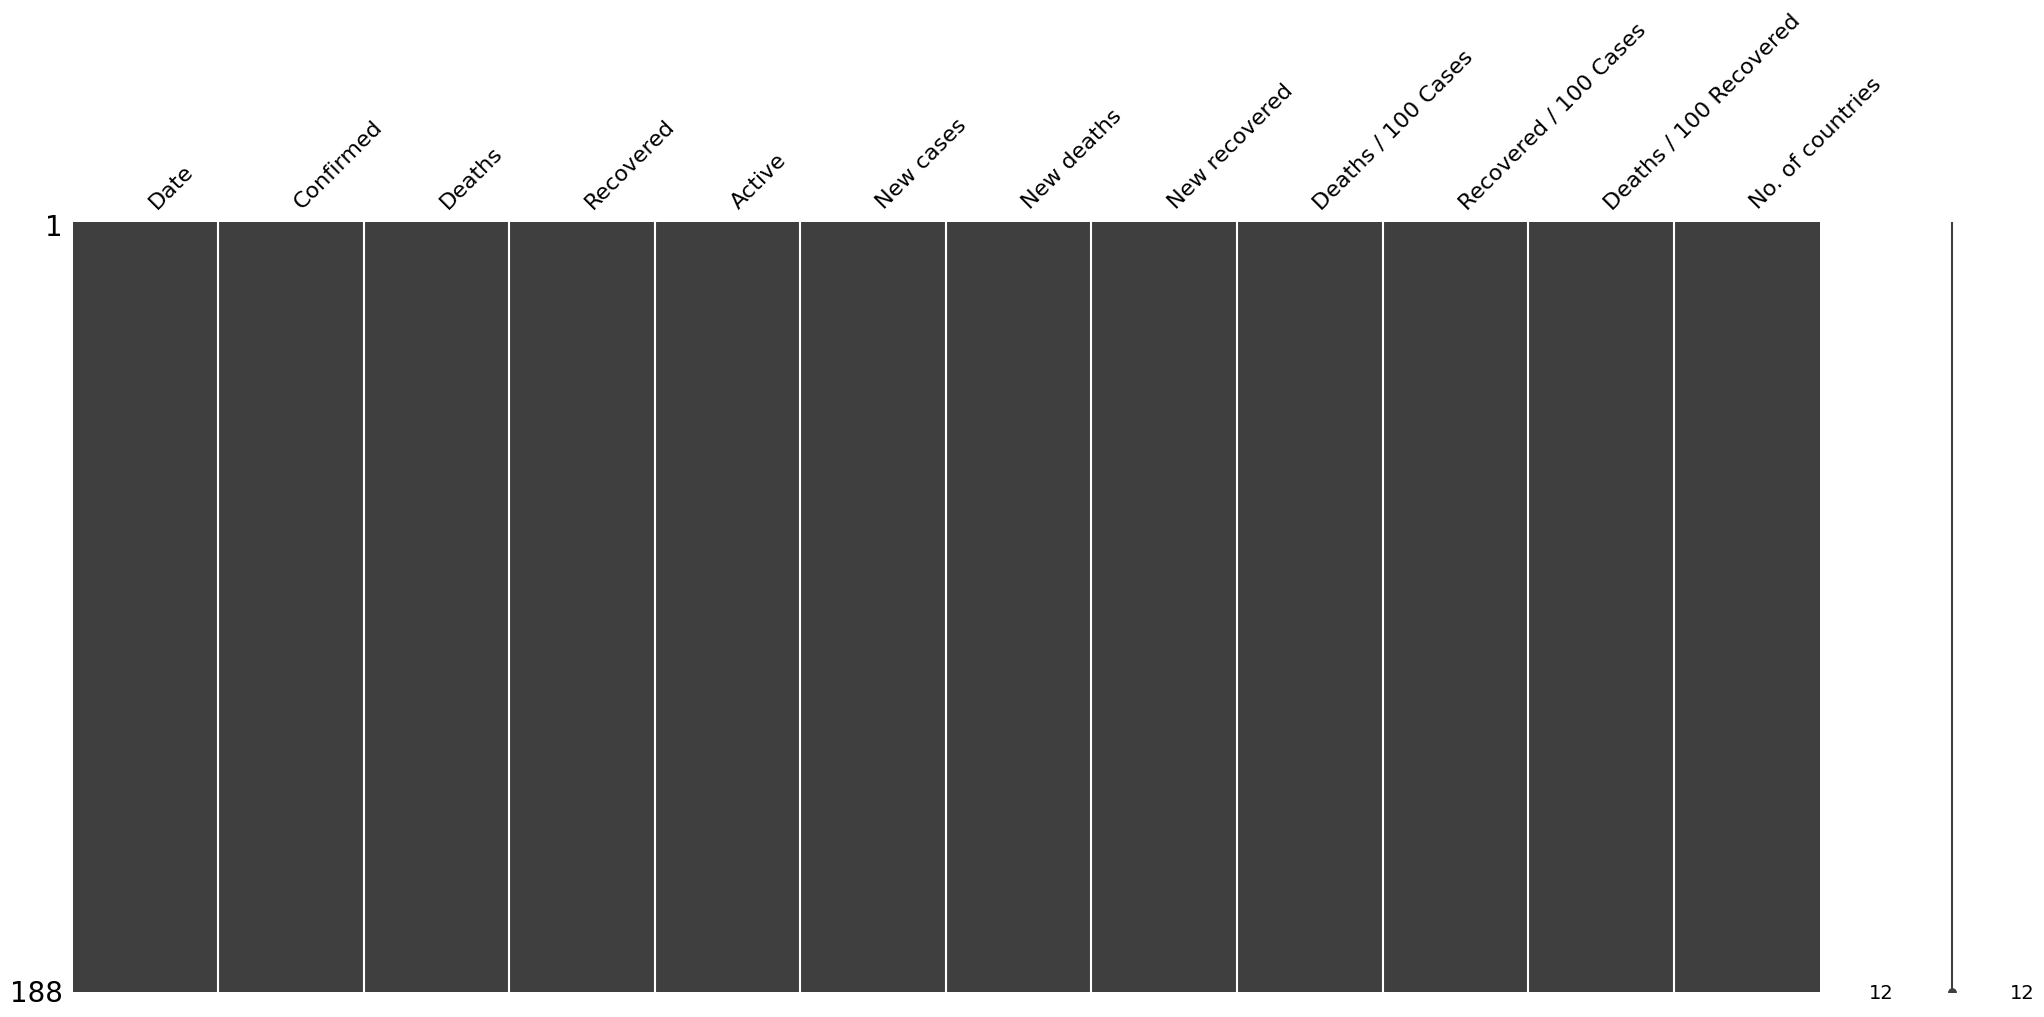

In [8]:
import missingno

missingno.matrix(daywise)

In [9]:
daywise.describe(include=[float,int])

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


### Checking For Duplicates

In [10]:
#There's no Duplicates
print(daywise.duplicated().sum())

0


### EDA

Text(0.5, 1.0, 'CORRELATION Matrix')

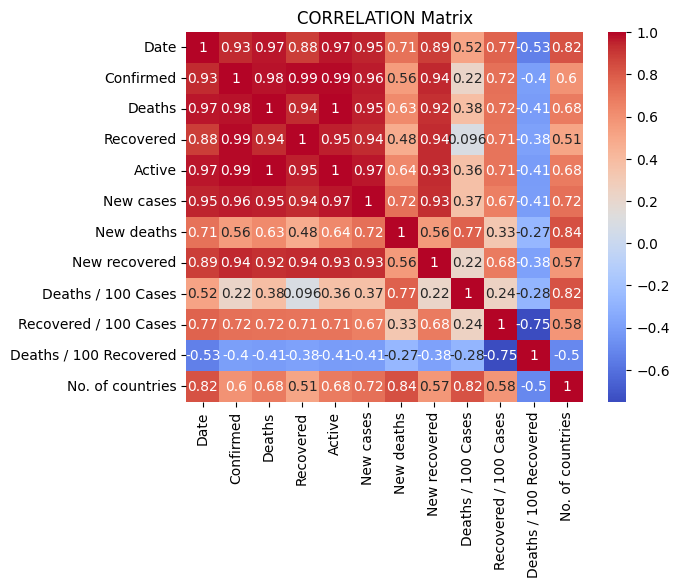

In [11]:
sns.heatmap(daywise.corr(),annot=True,cmap='coolwarm')
plt.title('CORRELATION Matrix')

In [12]:
#Showing Different Casses Over Time
px.line(daywise,x=['Confirmed','Deaths','Recovered','Active'],y='Date',title='COVID-19 Cases: Confirmed, Deaths, Recovered, and Active Over Time')

In [13]:
px.line(daywise,x=['New cases','New deaths','New recovered'],y='Date',title='COVID-19 Cases: New Cases, New Deaths, New Recovered Over Time')

In [14]:
px.scatter(daywise,x='Confirmed',y='Deaths',title='Confirmed Cases Vs Deaths ',size='Recovered',hover_name='No. of countries')

In [15]:
daywise.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [16]:
px.scatter(daywise,x='New cases',y='New deaths',color='New recovered',title='New Cases vs New Deaths')

In [17]:
#Showing Growth Rate for Confirmed and deaths
daywise['Confirmed Growth Rate']=daywise['Confirmed'].pct_change()*100
daywise['Deaths Growth Rate'] = daywise['Deaths'].pct_change() * 100

In [18]:
import plotly.graph_objects as go
fig = go.Figure()

# Add Confirmed Growth Rate line
fig.add_trace(go.Scatter(x=daywise['Date'], 
                         y=daywise['Confirmed Growth Rate'], 
                         mode='lines', 
                         name='Confirmed Growth Rate', 
                         line=dict(color='blue')))

# Add Deaths Growth Rate line
fig.add_trace(go.Scatter(x=daywise['Date'], 
                         y=daywise['Deaths Growth Rate'], 
                         mode='lines', 
                         name='Deaths Growth Rate', 
                         line=dict(color='red')))

fig.update_layout(title='Growth Rates of Confirmed Cases and Deaths Over Time',
                  xaxis_title='Date',
                  yaxis_title='Growth Rate (%)',
                  xaxis_tickangle=-45,
                  legend_title='Metrics')

fig.show()


In [19]:
#Recovery Rate And mortality Rate Over Time
daywise['Recovery_Rate']=daywise['Recovered']/daywise['Confirmed']*100
daywise['mortality_Rate']=daywise['Deaths']/daywise['Confirmed']*100

In [20]:
import plotly.graph_objects as go

# Create an empty figure
fig = go.Figure()

# Add Recovery Rate line
fig.add_trace(go.Scatter(x=daywise['Date'], 
                         y=daywise['Recovery_Rate'], 
                         mode='lines', 
                         name='Recovery Rate', 
                         line=dict(color='blue')))

# Add Mortality Rate line
fig.add_trace(go.Scatter(x=daywise['Date'], 
                         y=daywise['mortality_Rate'], 
                         mode='lines', 
                         name='Mortality Rate', 
                         line=dict(color='red')))

# Customize the layout
fig.update_layout(title='Recovery Rate and Mortality Rate Over Time',
                  xaxis_title='Date',
                  yaxis_title='Rate (%)',
                  template='plotly_dark')

# Show the plot
fig.show()
